# Veri setinin yüklenmesi ve incelenmesi 

In [11]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv("diabetes.csv")
df = df.copy()
df.dropna(inplace = True)
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### bağımlı değişkenimize bakalım 


In [14]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

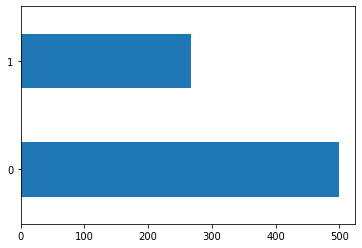

In [15]:
df.Outcome.value_counts().plot.barh();

# Bagımlı ve bağımsız değişken seçimleri 

In [16]:
y = df.Outcome

In [17]:
X = df.drop(["Outcome"] , axis = 1)

# Veri setinin Train - Test Olarak ayrılması 

In [18]:
from sklearn.model_selection import train_test_split , cross_val_score

In [19]:
X_train , X_test ,y_train , y_test = train_test_split(X ,y , test_size = 0.30 ,random_state = 11)

In [20]:
print(X_train.shape)
print(y_train.shape)


(537, 8)
(537,)


# Model kurma 

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train ,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
y_pred = rfc_model.predict(X_test)

In [24]:
accuracy_score(y_test ,y_pred)

0.7445887445887446

# Model Tuning 

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
- n_estimators = oğluşacak ağac sayısı
- max_features = maksimum değişken sayısı 


In [30]:
rfc_params = {"n_estimators" : [100 ,500 ,1000],
             "max_features" : [3 ,5 ,8],
             "max_depth" : [2 ,5 ,8 ,10],
             "min_samples_split" : [2 ,5 ,10]}



In [31]:
rfc_cv = GridSearchCV(rfc,
                     rfc_params,
                     cv = 10,
                     n_jobs = 10,
                     verbose = 2).fit(X_train ,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    4.6s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:   12.0s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:   25.0s
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:   48.9s
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 1080 out of 1080 | elapsed:  1.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
rfc_cv.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [33]:
y_pred = rfc_cv.predict(X_test)


In [34]:
accuracy_score(y_test  ,y_pred)

0.7835497835497836

# Model Tuning 

In [37]:
rf_tuned = RandomForestClassifier(max_depth = 10 ,
                                 max_features = 3,
                                 min_samples_split = 10,
                                 n_estimators = 100).fit(X_train ,y_train)

# Grafik oluşturma 

In [41]:
 rf_tuned.feature_importances_* 100

array([ 7.29074691, 32.63669776,  7.71084524,  5.51856907,  5.4528582 ,
       17.18146169, 12.63427256, 11.57454856])

In [39]:
Importance = pd.DataFrame( {"Importance" : rf_tuned.feature_importances_ * 100},
                         index = X_train.columns)

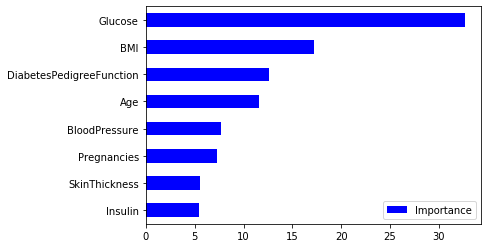

In [44]:
Importance.sort_values(by = "Importance" ,
                      axis = 0,
                      ascending = True).plot(kind = "barh" ,color = "b");